<a href="https://colab.research.google.com/github/xuang774/Deep-learning/blob/main/%E8%B0%83%E7%94%A8model%E9%A2%84%E6%B5%8B%E5%87%BD%E6%95%B0_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''!git clone https://github.com/Wentao-Xu/IGMTF.git
!cd IGMTF && tar -zxvf data.tar.gz && mkdir model
%cd /content/IGMTF'''

Cloning into 'IGMTF'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (35/35), 45.31 MiB | 45.31 MiB/s, done.
Resolving deltas: 100% (17/17), done.
data/
data/traffic.txt
data/exchange_rate.txt
data/electricity.txt
/content/IGMTF


Change:

1.   learn 210行加上 weight_only = false
2.   net.py第66行 sample_train_hidden =
        train_hidden.to(device)[day_index, :, :]
3.  learn.py 228 变成range(1)








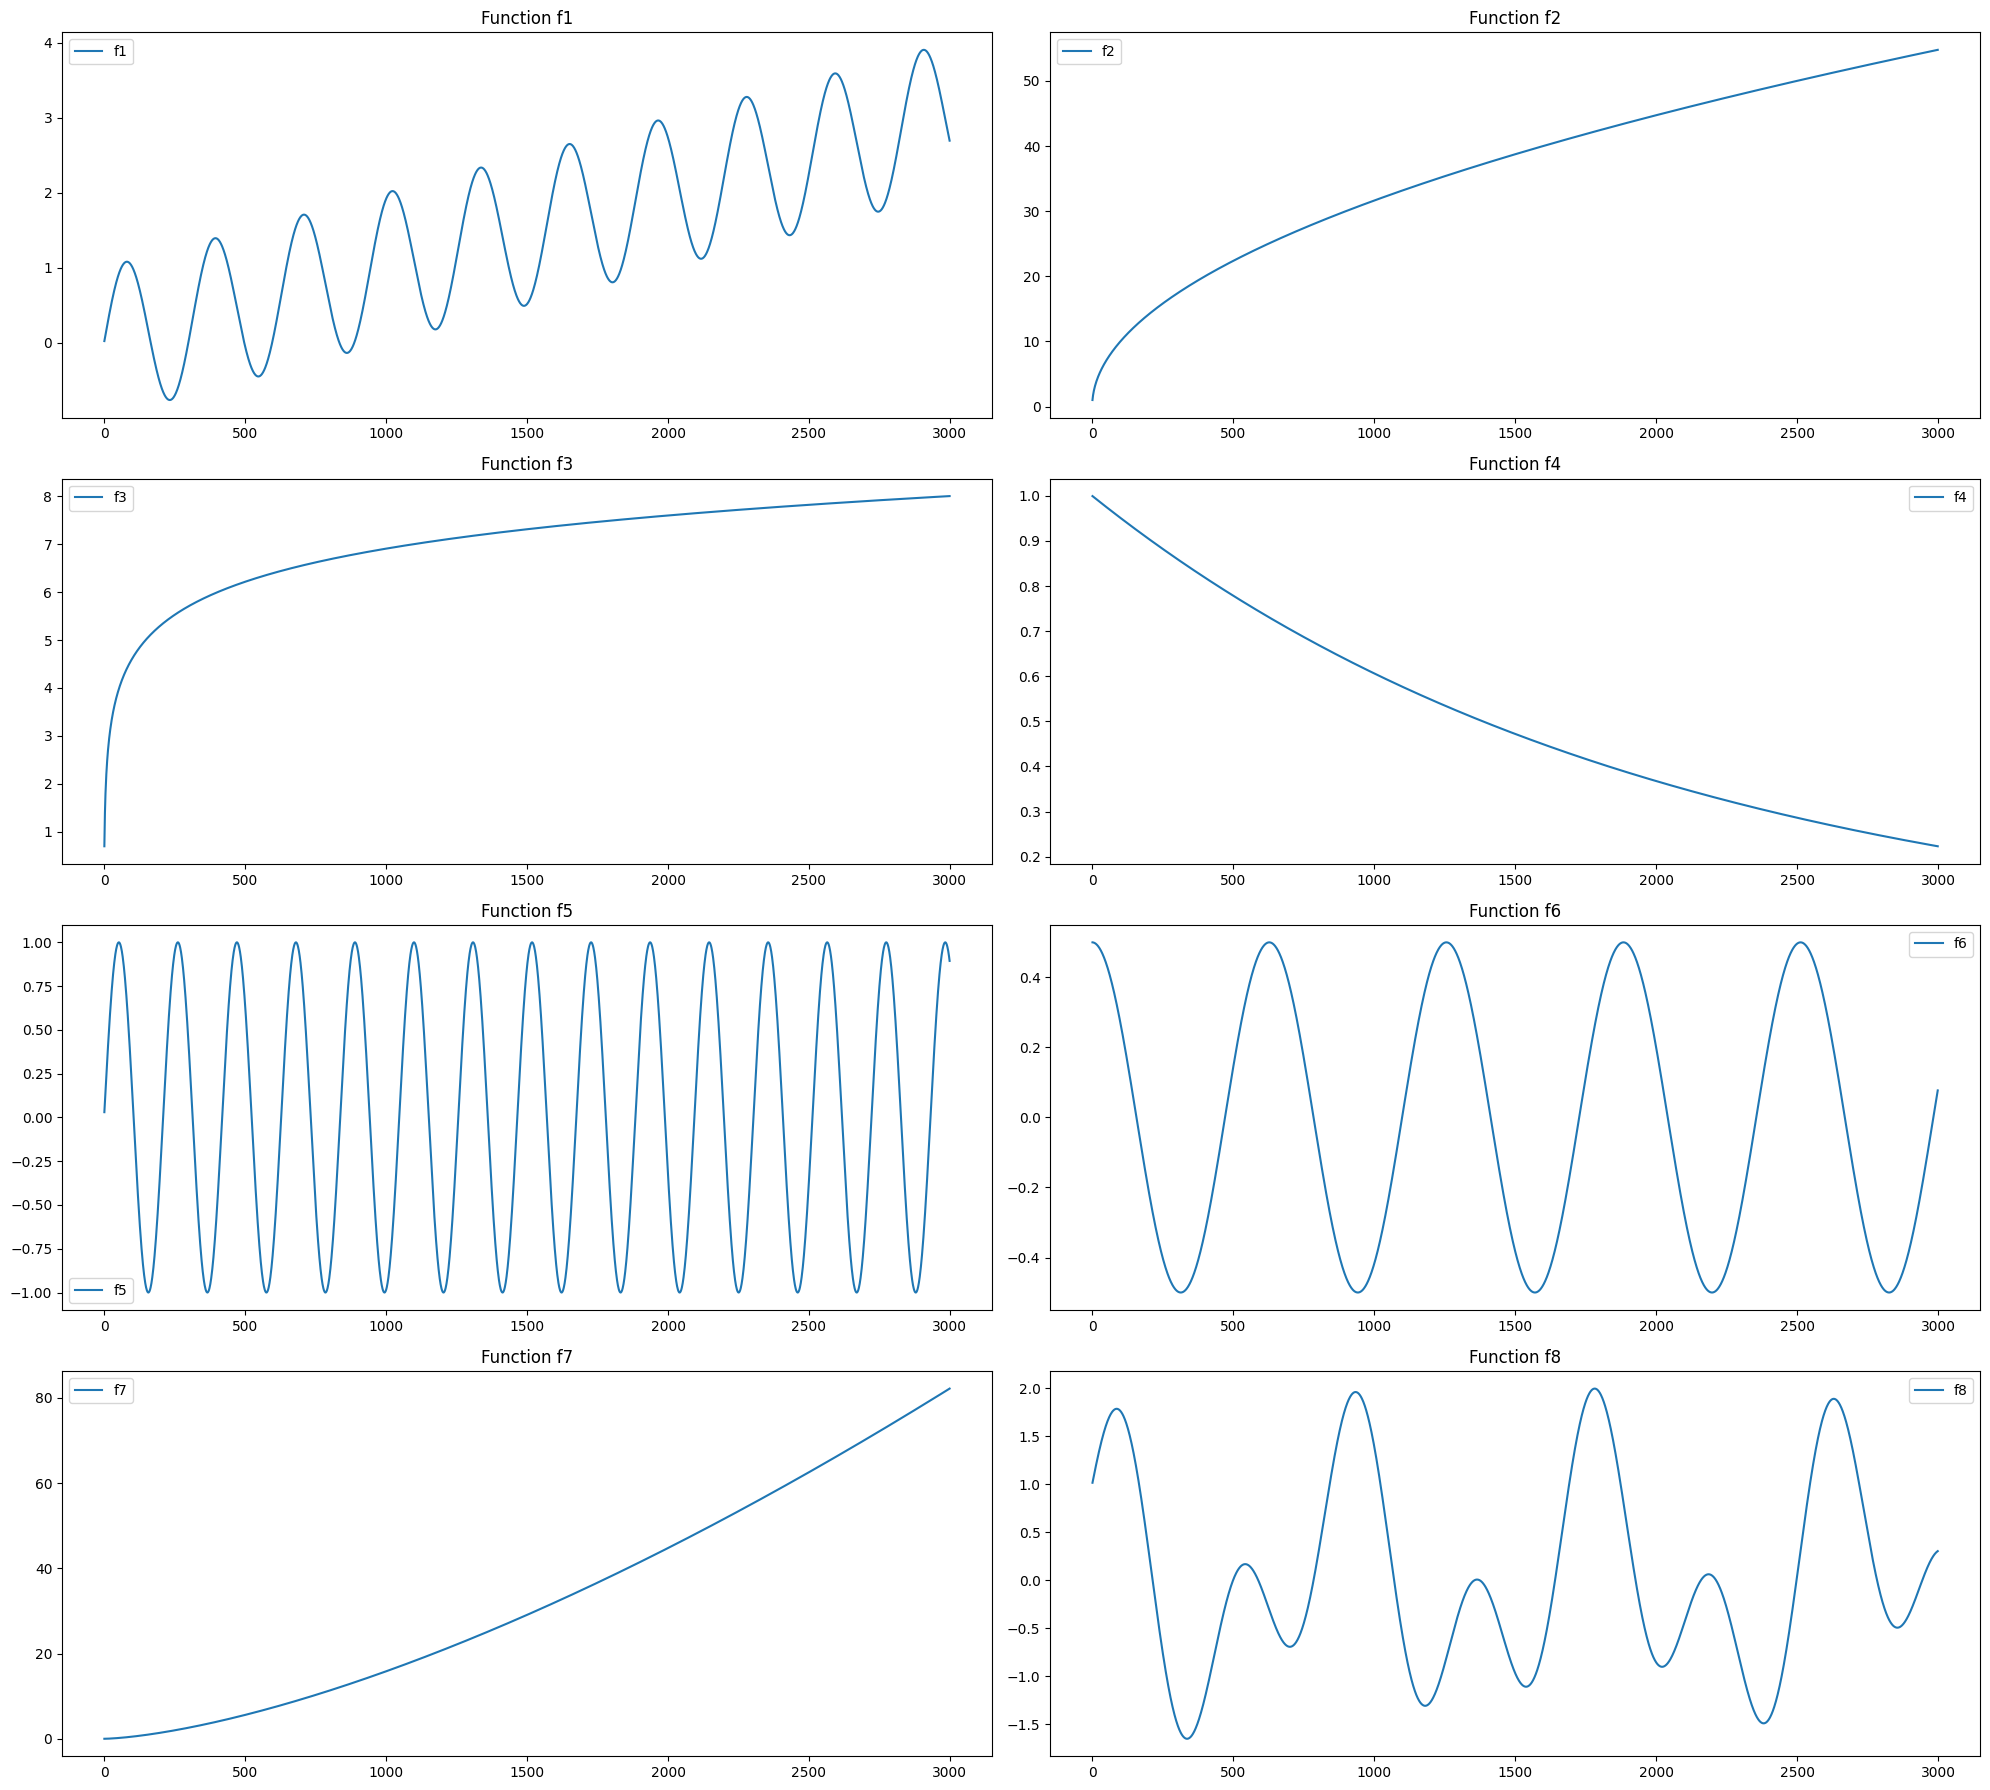

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 时间轴
x = np.arange(1, 10000)

# 8个设计好的独立可预测函数（无交叉依赖）
f1 = 0.001 * x + np.sin(0.02 * x)            # 线性+低频波动
f2 = np.sqrt(x)                              # 平滑增长
f3 = np.log(x + 1)                           # 对数增长
f4 = np.exp(-0.0005 * x)                     # 指数衰减
f5 = np.sin(0.03 * x)                        # 周期性强
f6 = np.cos(0.01 * x) * 0.5                  # 低幅余弦波
f7 = 0.0005 * x ** 1.5                       # 加速增长
f8 = np.sin(0.015 * x) + np.cos(0.007 * x)   # 混合正余弦波，复杂周期

# 拼成 DataFrame (10000, 8)，无任何交叉项
data = np.vstack([f1, f2, f3, f4, f5, f6, f7, f8]).T
df = pd.DataFrame(data)

# 保存训练数据：前10000个时间步
df.to_csv('/content/synthetic_predictable_test_data.txt', index=False, header=False)
# 可视化前3000个点
plt.figure(figsize=(20, 18))
for i in range(8):
    plt.subplot(4, 2, i + 1)
    plt.plot(df.iloc[:3000, i], label=f'f{i+1}')
    plt.legend()
    plt.title(f'Function f{i+1}')
plt.tight_layout()
plt.show()


In [ ]:
# Example
#!python learn.py --save ./model/model-exchange-3.pt --data ./content/synthetic_test_data.txt --num_nodes 8 --epoch 2 --horizon 3 --hidden_size 512 --batch_size 16 --k_day 10 --n_neighbor 10

In [9]:
!python learn.py --save ./model-synthetic.pt \
                --data /content/synthetic_predictable_test_data.txt \
                --num_nodes 8 \
                --epoch 100 \
                --horizon 1 \
                --hidden_size 512 \
                --batch_size 16 \
                --k_day 10 \
                --n_neighbor 10


[2025-03-23 14:59:04] - Namespace(device='cuda:0', data='/content/synthetic_predictable_test_data.txt', log_interval=2000, save='./model-synthetic.pt', optim='adam', L1Loss=1, normalize=2, num_nodes=8, seq_in_len=168, seq_out_len=1, horizon=1, batch_size=16, lr=0.0001, weight_decay=0.0001, clip=5, propalpha=0.05, tanhalpha=3, epochs=100, num_split=1, step_size=100, d_feat=7, hidden_size=512, num_gru_layer=1, k_day=10, n_neighbor=10, hidden_batch_size=128)
[2025-03-23 14:59:04] - Number of model parameters is 3163137
/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
begin training
/content/net.py:17: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:644.)
 

<ipython-input-23-a5deac1d1a12>:14: RuntimeWarning: overflow encountered in exp
  [lambda x: 90 * x, lambda x:  np.exp(x) -400 , lambda x: 0.20 * x - 80])                             # 倒数递减型函数


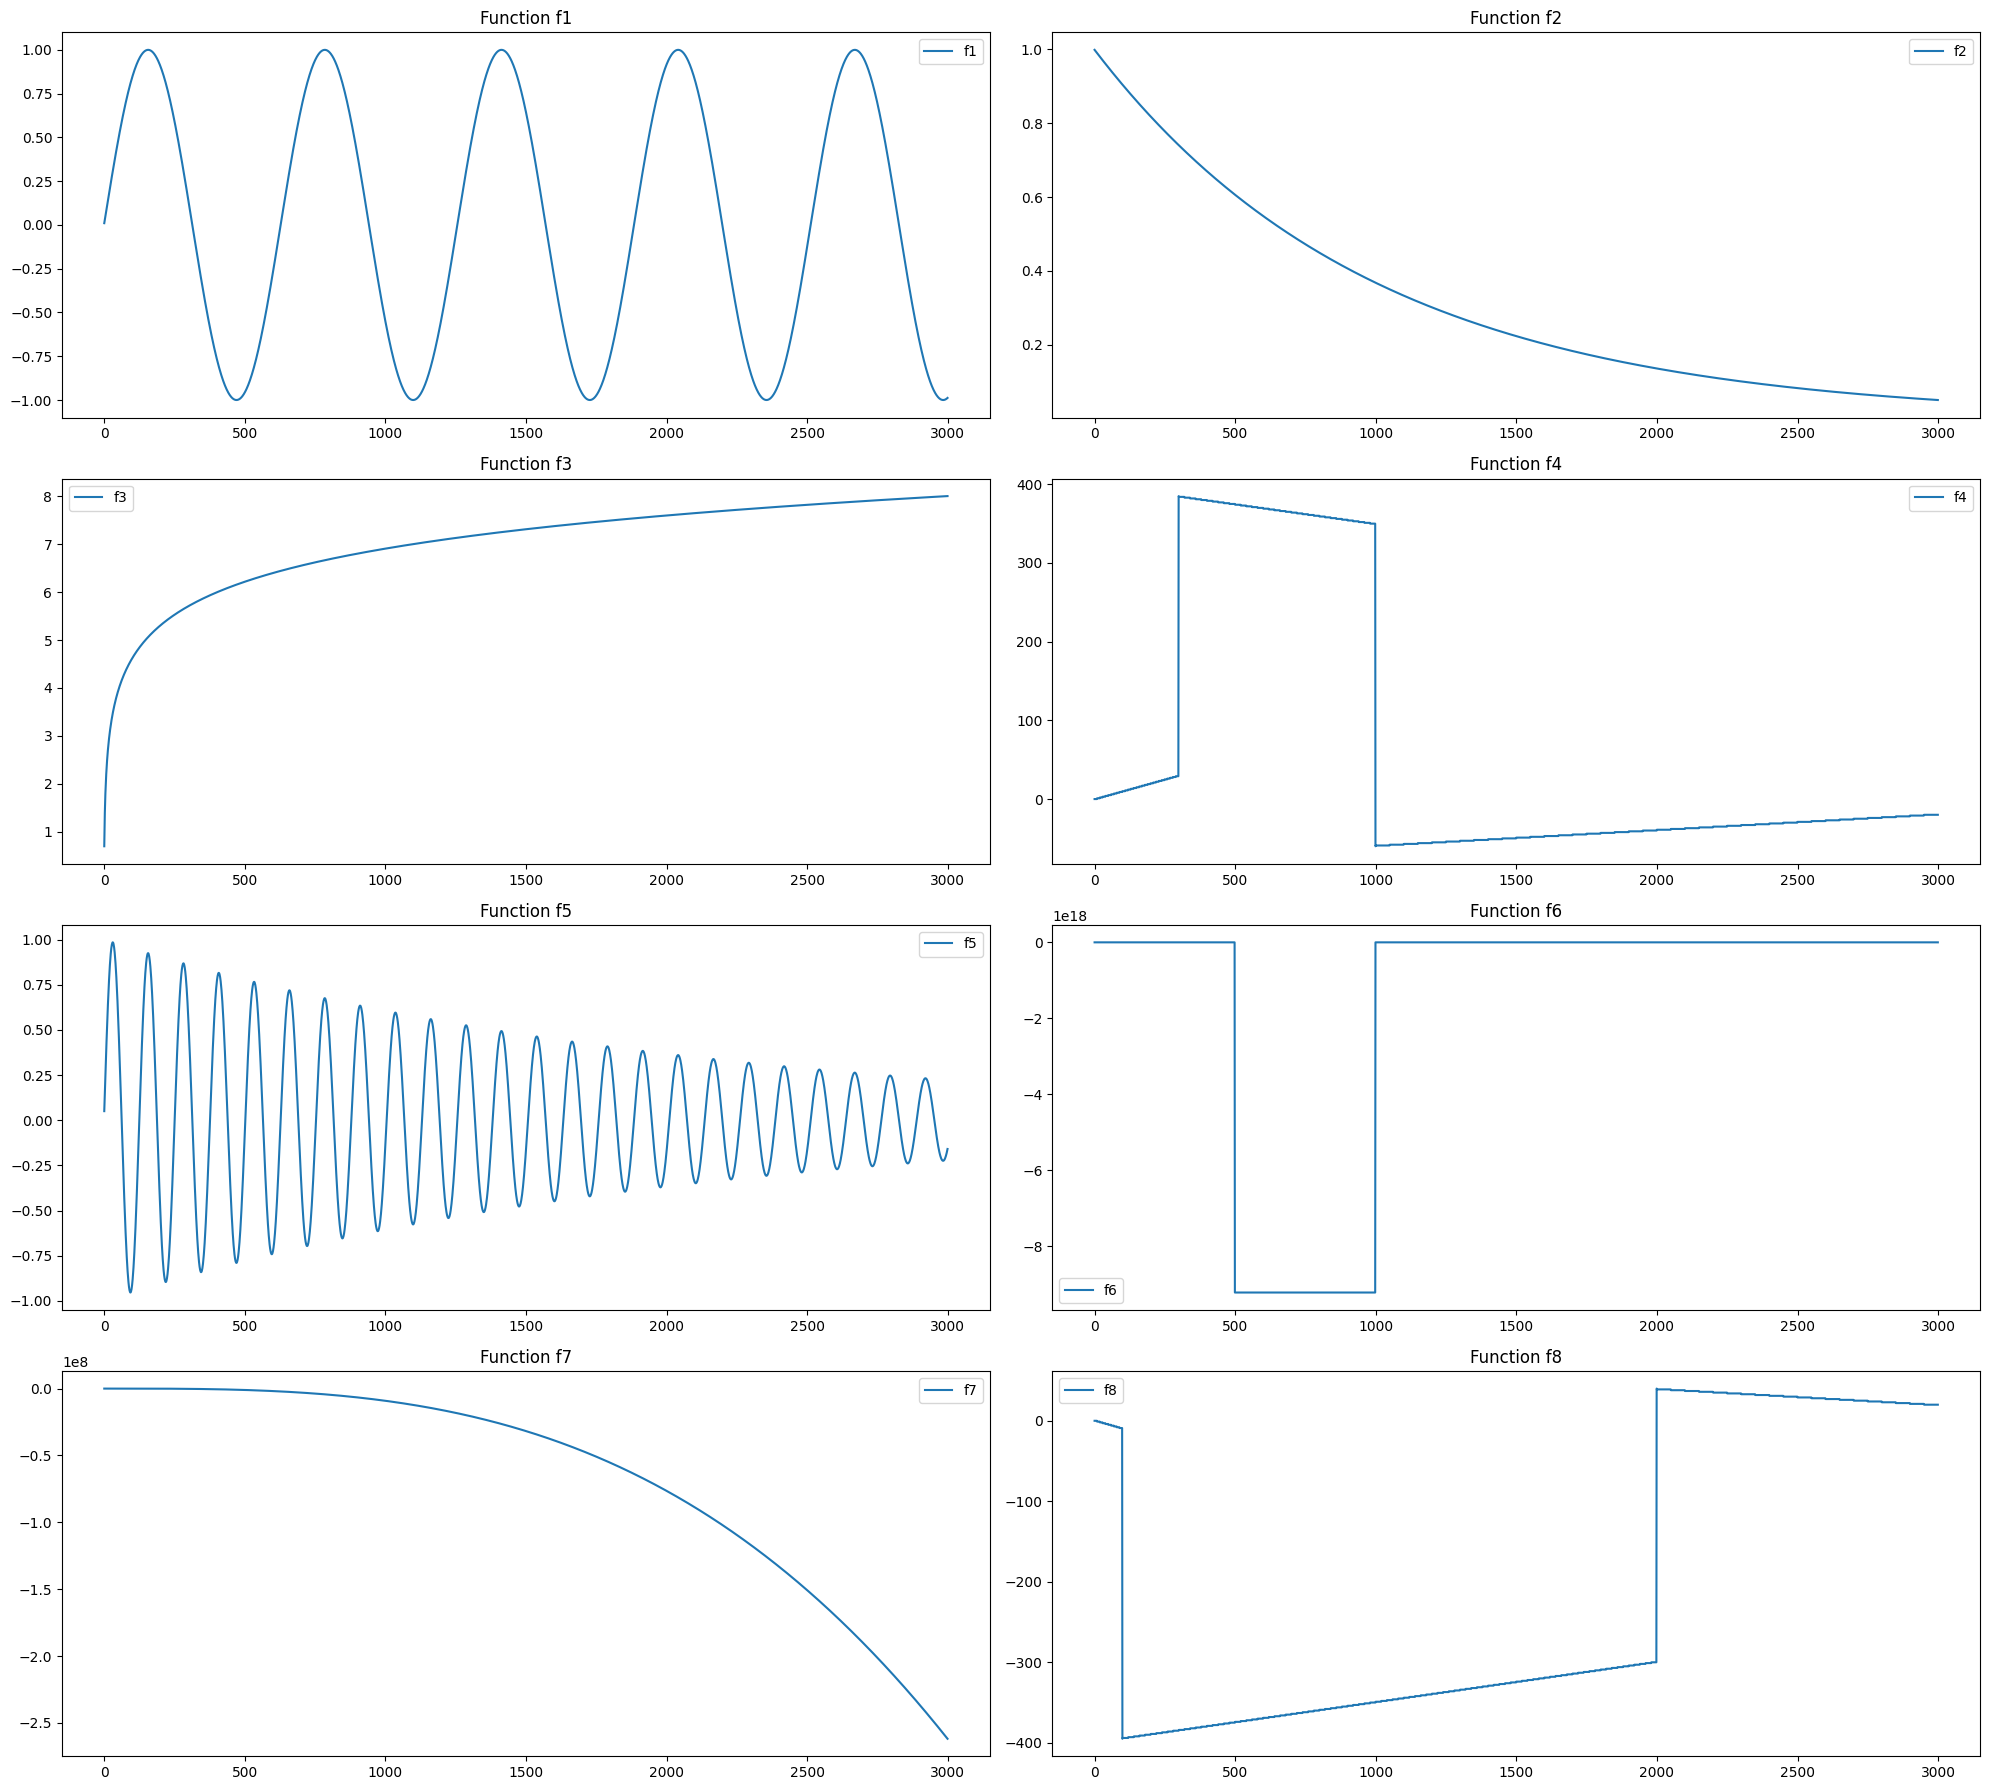

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(1, 10000)

f1 = np.sin(0.01 * x)                             # 低频正弦
f2 = np.exp(-0.001 * x)                           # 快速指数衰减
f3 = np.log(x + 1)                                # 对数增长
f4 = np.piecewise(x, [x < 300, (x >= 300) & (x < 1000), x >= 1000],
                  [lambda x: 0.1 * x, lambda x: -0.05 * x + 400, lambda x: 0.02 * x - 80])  # 分段线性
f5 = np.sin(0.05 * x) * np.exp(-0.0005 * x)       # 衰减振荡
f6 =  np.piecewise(x, [x < 500, (x >= 500) & (x < 1000), x >= 1000],
                  [lambda x: 90 * x, lambda x:  np.exp(x) -400 , lambda x: 0.20 * x - 80])                             # 倒数递减型函数
f7 = -0.01 * x ** 3  + 0.9 * x**2                # 二次增长
f8 = np.piecewise(x, [x < 100, (x >= 100) & (x < 2000), x >= 2000],
                  [lambda x: -0.1 * x, lambda x: 0.05 * x - 400, lambda x: -0.02 * x + 80])  # 分段线性

data = np.vstack([f1, f2, f3, f4, f5, f6, f7, f8]).T
df = pd.DataFrame(data)

# 可视化前3000个点
plt.figure(figsize=(20, 18))
for i in range(8):
    plt.subplot(4, 2, i + 1)
    plt.plot(df.iloc[:3000, i], label=f'f{i+1}')
    plt.legend()
    plt.title(f'Function f{i+1}')
plt.tight_layout()
plt.show()
df.to_csv('/content/synthetic_predictable_test_data_v2.txt', index=False, header=False)

In [24]:
!python learn.py --save ./model-synthetic_v2.pt \
                --data /content/synthetic_predictable_test_data_v2.txt \
                --num_nodes 8 \
                --epoch 100 \
                --horizon 1 \
                --hidden_size 512 \
                --batch_size 16 \
                --k_day 10 \
                --n_neighbor 10

[2025-03-23 15:46:30] - Namespace(device='cuda:0', data='/content/synthetic_predictable_test_data_v2.txt', log_interval=2000, save='./model-synthetic_v2.pt', optim='adam', L1Loss=1, normalize=2, num_nodes=8, seq_in_len=168, seq_out_len=1, horizon=1, batch_size=16, lr=0.0001, weight_decay=0.0001, clip=5, propalpha=0.05, tanhalpha=3, epochs=100, num_split=1, step_size=100, d_feat=7, hidden_size=512, num_gru_layer=1, k_day=10, n_neighbor=10, hidden_batch_size=128)
[2025-03-23 15:46:30] - Number of model parameters is 3163137
/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
begin training
/content/net.py:17: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:6